In [5]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import winsound

def beep():
    winsound.PlaySound("beep", winsound.SND_FILENAME)

def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary)
    plt.axis("off")

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True)

In [2]:
dataset,labels = mnist['data'], mnist['target']

In [3]:
import numpy as np
labels = labels.astype(np.uint8)

In [4]:
data_train,  data_test  = dataset[:60000], dataset[60000:]
label_train, label_test = labels[:60000],  labels[60000:]

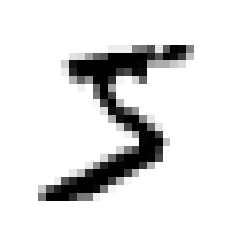

In [11]:
from numpy.random import permutation

shuffle_index = permutation(60000)# get random order of 1~60000
data_train,label_train = data_train[shuffle_index], label_train[shuffle_index]
some_digit = dataset[0]
plot_digit(some_digit)

In [12]:
noise = np.random.randint(0, 100, (len(data_train), 784))
data_train_mod = data_train + noise
noise = np.random.randint(0, 100, (len(data_test), 784))
data_test_mod = data_test + noise
label_train_mod = data_train
label_test_mod = data_test

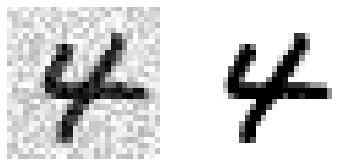

In [13]:
some_index = 5500
plt.subplot(121); plot_digit(data_test_mod[some_index])
plt.subplot(122); plot_digit(label_test_mod[some_index])
plt.show()

In [9]:
from sklearn.neighbors import KNeighborsClassifier

label_train_large = (label_train >= 7)
label_train_odd = (label_train % 2 == 1)
label_multilabel = np.c_[label_train_large, label_train_odd]

knn_clf = KNeighborsClassifier(n_jobs=6)
knn_clf.fit(data_train, label_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=6, n_neighbors=5, p=2,
                     weights='uniform')

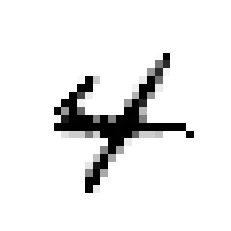

In [14]:
knn_clf.fit(data_train_mod, label_train_mod)
clean_digit = knn_clf.predict([data_test_mod[some_index]])
plot_digit(clean_digit)